In [4]:

import pandas as pd 
from glob import glob 

In [5]:
met = pd.read_csv("/mnt/storage/ramon_data_curations/png_kaggle_dataset/meta/metadata_0.csv",dtype='str') #metadata of dicom files. corresponding dicom file name is in the column file
maps = pd.read_csv("/mnt/storage/ramon_data_curations/png_kaggle_dataset/maps/mapping_0.csv",dtype='str')#mapping from dicom file to pngs 

In [3]:
# first lets see what the metadata file looks like

In [6]:
met.head()

,BitsAllocated,BitsStored,BodyPartThickness,Columns,CompressionForce,ContentDate,ContentTime,ExposureControlMode,ExposureControlModeDescription,HighBit,...,SamplesPerPixel,SeriesInstanceUID,StudyInstanceUID,WindowCenter,WindowWidth,file,has_pix_array,category,PartialView,VOILUTFunction
0,16,12,58.0,3328,80.51243,20221118,184751.449708,AUTOMATIC,AutoFilter,11,...,1,1.2.840.10009.1.2.3.46381.1,1.2.840.10009.1.2.3.46381,2047.0,4096.0,/mnt/storage/breast_cancer_kaggle/train_images...,True,uncategorized,NaN,NaN
1,16,12,73.0,2560,65.83337,20221118,185135.361156,AUTOMATIC,AutoFilter,11,...,1,1.2.840.10009.1.2.3.40317.1,1.2.840.10009.1.2.3.40317,2047.0,4096.0,/mnt/storage/breast_cancer_kaggle/train_images...,True,uncategorized,NaN,NaN
2,16,12,70.0,2560,92.96738,20221118,185134.999618,AUTOMATIC,AutoFilter,11,...,1,1.2.840.10009.1.2.3.40317.1,1.2.840.10009.1.2.3.40317,2047.0,4096.0,/mnt/storage/breast_cancer_kaggle/train_images...,True,uncategorized,NaN,NaN
3,16,12,51.0,3328,79.17796,20221118,184751.783045,AUTOMATIC,AutoFilter,11,...,1,1.2.840.10009.1.2.3.46381.1,1.2.840.10009.1.2.3.46381,2047.0,4096.0,/mnt/storage/breast_cancer_kaggle/train_images...,True,uncategorized,NaN,NaN
4,16,12,83.0,2560,49.81984,20221118,185134.833829,AUTOMATIC,AutoFilter,11,...,1,1.2.840.10009.1.2.3.40317.1,1.2.840.10009.1.2.3.40317,2047.0,4096.0,/mnt/storage/breast_cancer_kaggle/train_images...,True,uncategorized,NaN,NaN


In [5]:
met.keys()

Index(['BitsAllocated', 'BitsStored', 'BodyPartThickness', 'Columns',
       'CompressionForce', 'ContentDate', 'ContentTime', 'ExposureControlMode',
       'ExposureControlModeDescription', 'HighBit', 'ImageLaterality',
       'InstanceNumber', 'LossyImageCompression', 'PatientID',
       'PhotometricInterpretation', 'PixelIntensityRelationship',
       'PixelIntensityRelationshipSign', 'PixelPaddingValue',
       'PixelRepresentation', 'PixelSpacing', 'RescaleIntercept',
       'RescaleSlope', 'RescaleType', 'Rows', 'SOPInstanceUID',
       'SamplesPerPixel', 'SeriesInstanceUID', 'StudyInstanceUID',
       'WindowCenter', 'WindowWidth', 'file', 'has_pix_array', 'category',
       'PartialView', 'VOILUTFunction'],
      dtype='object')

# important Tags are 
 - PatientID --> Unique patient identifier 
 - PhotometricInterpretation -->  tells you if image is RGB, MONOCHROME1,MONOCHROME 2 ( will discuss later on)
 - as you work with the dataset more you will come to find some other columns useful for now these 2 will do 

# what does the mapping file look like 
 - it is simply a mapping from dicoms to png paths 
 - we can merge metadata dataframe with mapping frame to have an easier time working with images

In [7]:
maps.head()

,Original DICOM file location,PNG location
0,/mnt/storage/breast_cancer_kaggle/train_images...,/mnt/storage/ramon_data_curations/png_kaggle_...
1,/mnt/storage/breast_cancer_kaggle/train_images...,/mnt/storage/ramon_data_curations/png_kaggle_...
2,/mnt/storage/breast_cancer_kaggle/train_images...,/mnt/storage/ramon_data_curations/png_kaggle_...
3,/mnt/storage/breast_cancer_kaggle/train_images...,/mnt/storage/ramon_data_curations/png_kaggle_...
4,/mnt/storage/breast_cancer_kaggle/train_images...,/mnt/storage/ramon_data_curations/png_kaggle_...


In [7]:
#lets merge the mapping file and the metadata file

In [8]:
df = pd.merge(met,maps,left_on='file',right_on='Original DICOM file location') 

In [9]:
df.shape 

(548, 37)

# Viewing our dataset. Photometric interpretation 
 - It is a tag describing the appearance of your image 
 - There are 3 common values. RGB  usual image you are accostumed. 
 -  MONOCHROME1  grayscale image where a the background is treated as white while foreground is darker  
 -  MONOCHROME 2  grayscale image where the background is treated as black while foreground is lighter
 - you can convert from one monochorme to the other using the np invert function i believe 

In [10]:
df['PhotometricInterpretation'].value_counts()

MONOCHROME2    439
MONOCHROME1    109
Name: PhotometricInterpretation, dtype: int64

In [11]:
maps.keys()

Index(['Original DICOM file location', ' PNG location '], dtype='object')

In [12]:
df['png_path'] =df[' PNG location '].apply(lambda x: x.strip(" "))

Text(0.5, 1.0, 'Monochrome 2 Image')

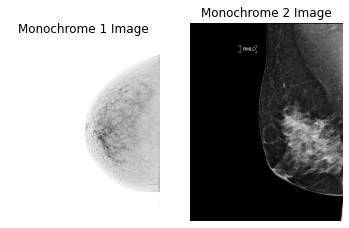

In [13]:
from PIL import Image 
import numpy as np 
import matplotlib.pyplot as plt 
def plot_img(path): 
    with  Image.open(path) as f: 
        arr = np.array(f) 
    plt.imshow(arr,cmap='gray')
    plt.axis('off')

plt.subplot(1,2,1) 
plot_img(df[df['PhotometricInterpretation']=='MONOCHROME1'].iloc[0]['png_path'])
plt.title("Monochrome 1 Image")
plt.subplot(1,2,2) 
plot_img(df[df['PhotometricInterpretation']=='MONOCHROME2'].iloc[1]['png_path'])
plt.title("Monochrome 2 Image")


 - For most usecases you will be working with monochrome2 images 
 - Make sure to filter using that tag 

In [14]:
met['VOILUTFunction'].value_counts()

SIGMOID    109
LINEAR       4
Name: VOILUTFunction, dtype: int64

In [15]:
df = df[df['PhotometricInterpretation']=='MONOCHROME2'].copy()

In [16]:
df['VOILUTFunction'].value_counts()

SIGMOID    18
Name: VOILUTFunction, dtype: int64

#  SIDE NOTE: Why did some other images have weird appearance even if monochrome2? 
 - Some images  have different intensity ranges they are displayed in. Usually can identify that using the VOILUT function  column 
 - we will load the raw dcms to visualize this  
 - you can  make the left image look like the one on the right using the voi_lut function in pydicom  

In [2]:
import pandas as pd
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt

(-0.5, 3327.5, 4095.5, -0.5)

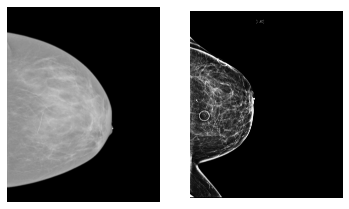

In [17]:
import pydicom as pyd 
plt.subplot(1,2,1)
sample_dcm =  pyd.dcmread(df[df['VOILUTFunction']=='SIGMOID']['file'].iloc[0]).pixel_array 
plt.imshow(sample_dcm,cmap='gray')
plt.axis('off')
plt.subplot(1,2,2)
sample_dcm =  pyd.dcmread(df[df['VOILUTFunction']!='SIGMOID']['file'].iloc[0]).pixel_array 
plt.imshow(sample_dcm,cmap='gray')
plt.axis('off')

# Alternative method for building datasets 
 - this section just goes over how i like to build datasets 
 - The simplest way i like is to randomly partition datasets based on patient IDs 
 - Note that it is possible for 1 patient to have multiple images in a dataset. So we cannot just paritition on imageid (unless there's 1 image per patient)
 - having the same patient in train and test would constitute data leakage 

In [24]:
from sklearn.model_selection import train_test_split

train_ids, test_ids = train_test_split(df['PatientID'].unique(),test_size=0.25,random_state=1996)
df['split'] = None 
df.loc[df['PatientID'].isin(train_ids),'split']='train' 
df.loc[df['PatientID'].isin(test_ids),'split']='test' 

In [19]:
df['split'].value_counts(normalize=True)

train    0.747153
test     0.252847
Name: split, dtype: float64

In [1]:
from torch.utils.data import Dataset
from torchvision.transforms import PILToTensor,Compose,Resize
class mammoDataset(Dataset):
    def __init__(self,data_df,split,transforms=None): 
        self.df = data_df[data_df['split']==split] 
        self.transforms = transforms
    def __len__(self): 
        return self.df.shape[0] 
    def load_img(self,s): 
        with Image.open(s,'r') as f: 
            if self.transforms: 
                return self.transforms(f)
            else: 
                return np.array(f)  

    def __getitem__(self,idx): 
        img_path = self.df.iloc[idx]['png_path'] 
        img = self.load_img(img_path)
        dummy_label = 1 
        return img,dummy_label

In [2]:
train_transforms= Compose([PILToTensor(),Resize((256,256))])

In [3]:
train_ds  = mammoDataset(df,'train',transforms=train_transforms)

NameError: name 'df' is not defined

In [39]:
img,a = train_ds.__getitem__(0)

/home/ramon/miniconda3/lib/python3.9/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


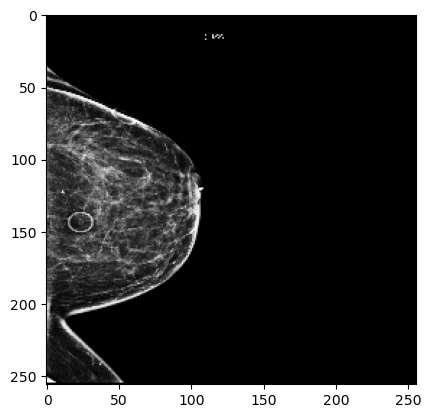

In [43]:
plt.imshow(img[0],cmap='gray')